# **IndiaTravel Insights: Best Daytime Prediction and Destination Clustering**

## **Content**

1.   Introduction
2.   Importing Libraries
3.   Dataset Overview
4.   Data visualization
   
5.   Feature Engineering

     5.1. Encode Categorical Features

     5.2. Feature Scaling

     5.3. Train-Test Split
6.   Model Development & Evaluation

     6.1. Classification: Predict "Best DayTime to Visit"

     6.2. Clustering: Group Similar Destinations


##**1. Introduction**

Every journey through India is not a vacation, it's an education.- Shashi Tharoor

Welcome to "India Travel Insights: Best Daytime Prediction and Destination Clustering", a smart travel guide made using data. This project explores the beauty of India from the calm mountains in the north to the colorful palaces of Rajasthan, busy cities and peaceful beaches in the south.

The project has two exciting goals:
1. Predicting best Daytime to visit destinations using models like Logistic Regression, Decision Tree, SVM and Random Forest.
2. Group similar destinations together through clustering techniques like K-means, DBSCAN, Hierarchical Clustering and KNN to reveal interesting travel patterns.


## **2. Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

## **3. Dataset Overview**

In [3]:
# Load the dataset
df = pd.read_csv("/content/India Travel Insights.csv")

In [4]:
df.shape

(324, 11)

In [5]:
df.size

3564

In [6]:
df.dtypes

,0
Unnamed: 0,int64
Zone,object
State,object
City,object
Name,object
Type,object
Significance,object
Entrance Fee in INR,int64
Google review rating,float64
Weekly Off,object


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             324 non-null    int64  
 1   Zone                   324 non-null    object 
 2   State                  324 non-null    object 
 3   City                   324 non-null    object 
 4   Name                   324 non-null    object 
 5   Type                   324 non-null    object 
 6   Significance           324 non-null    object 
 7   Entrance Fee in INR    324 non-null    int64  
 8   Google review rating   324 non-null    float64
 9   Weekly Off             32 non-null     object 
 10  Best DayTime to visit  324 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 28.0+ KB


In [8]:
df.head()

,Unnamed: 0,Zone,State,City,Name,Type,Significance,Entrance Fee in INR,Google review rating,Weekly Off,Best DayTime to visit
0,0,Northern,Delhi,Delhi,India Gate,War Memorial,Historical,0,4.6,NaN,Evening
1,1,Northern,Delhi,Delhi,Humayun's Tomb,Monument,Historical,30,4.5,NaN,Afternoon
2,2,Northern,Delhi,Delhi,Akshardham Temple,Temple,Religious,60,4.6,NaN,Afternoon
3,3,Northern,Delhi,Delhi,Waste to Wonder Park,Amusement Park,Recreational,50,4.1,Monday,Evening
4,4,Northern,Delhi,Delhi,Jantar Mantar,Archaeological Site,Archaeological,15,4.2,NaN,Morning


**Obseravtion:** The dataset contains 16 columns. Here’s a brief overview of the columns-


* **Zone:** Geographical region of the place within India categorizing it into zones.
* **State:** The state in which the place is located.
* **City**: The city where the destination is situated.
* **Name**: The name of the tourist spot.
* **Type**: Classification of the place.
* **Significance**: The importance or role of the place.
* **Entrance Fee in INR**: The cost of visiting in Indian Rupees.
* **Google Review Rating**: The average Google review rating for the place, indicative of its popularity and visitor satisfaction.
* **Weekly Off**: The day of the week when the place is closed to visitors.
* **Best Time to Visit**: Suggested time of the day for visiting the place to have the best experience.



In [9]:
#drop unecessary column
df.drop("Unnamed: 0",axis=1,inplace=True)

In [10]:
# check if the data contains any null values
df.isnull().sum()

,0
Zone,0
State,0
City,0
Name,0
Type,0
Significance,0
Entrance Fee in INR,0
Google review rating,0
Weekly Off,292
Best DayTime to visit,0


**Observation**: There is one column named 'weekly' that has 292 null values which means there are 292 places that allow visitors to visit any day without a weekday off. So, we will fill these cells with 'All Days Open'.

In [11]:
df["Weekly Off"].fillna("All day open",inplace=True)
df.isnull().sum()

,0
Zone,0
State,0
City,0
Name,0
Type,0
Significance,0
Entrance Fee in INR,0
Google review rating,0
Weekly Off,0
Best DayTime to visit,0


**Observation:** Now, there is no null values in the dataset.

In [12]:
df.describe()

,Entrance Fee in INR,Google review rating
count,324.000000,324.000000
mean,116.074074,4.485494
std,531.659410,0.274746
min,0.000000,1.400000
25%,0.000000,4.400000
50%,0.000000,4.500000
75%,40.000000,4.600000
max,7500.000000,4.900000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zone                   324 non-null    object 
 1   State                  324 non-null    object 
 2   City                   324 non-null    object 
 3   Name                   324 non-null    object 
 4   Type                   324 non-null    object 
 5   Significance           324 non-null    object 
 6   Entrance Fee in INR    324 non-null    int64  
 7   Google review rating   324 non-null    float64
 8   Weekly Off             324 non-null    object 
 9   Best DayTime to visit  324 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 25.4+ KB


In [14]:
df.head()

,Zone,State,City,Name,Type,Significance,Entrance Fee in INR,Google review rating,Weekly Off,Best DayTime to visit
0,Northern,Delhi,Delhi,India Gate,War Memorial,Historical,0,4.6,All day open,Evening
1,Northern,Delhi,Delhi,Humayun's Tomb,Monument,Historical,30,4.5,All day open,Afternoon
2,Northern,Delhi,Delhi,Akshardham Temple,Temple,Religious,60,4.6,All day open,Afternoon
3,Northern,Delhi,Delhi,Waste to Wonder Park,Amusement Park,Recreational,50,4.1,Monday,Evening
4,Northern,Delhi,Delhi,Jantar Mantar,Archaeological Site,Archaeological,15,4.2,All day open,Morning


## **4. Data Visualization**

**Pie- chart of tourist places by zone**

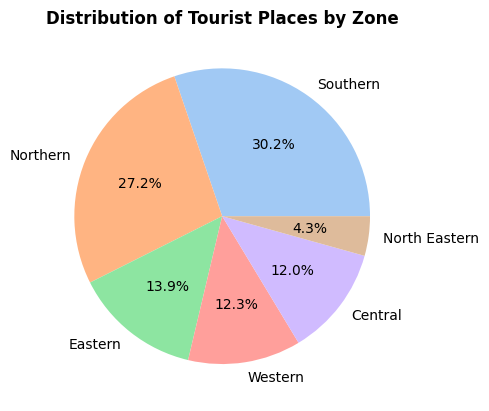

In [15]:
zone= df['Zone'].value_counts()
plt.pie(zone, labels=zone.index,colors=sns.color_palette('pastel'),autopct='%1.1f%%')
plt.title("Distribution of Tourist Places by Zone", fontweight='bold')
plt.show()

**Unique cities in the dataset**

In [16]:
city=df["City"].value_counts()
city

,count
City,
Delhi,16
Goa,14
Hyderabad,11
Mumbai,10
Kolkata,10
...,...
Neil Island,1
Port Blair,1
Bodh Gaya,1


**Top 10 & Lowest 10 , Cities as per Tourist Places**

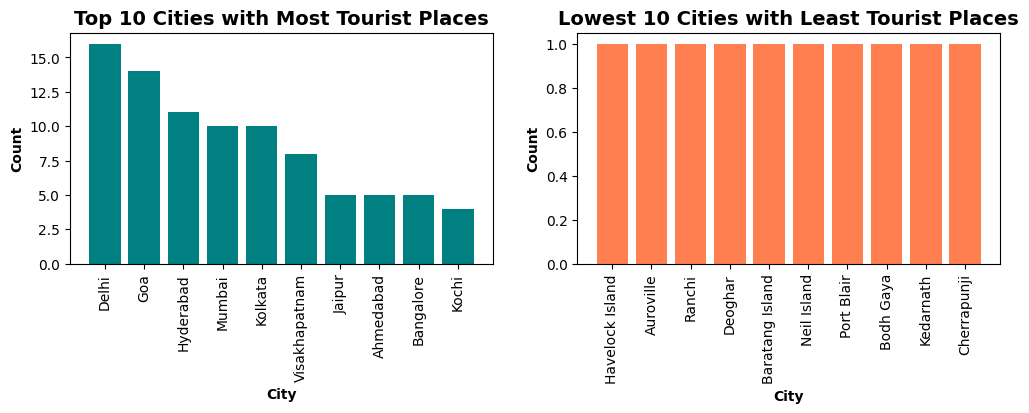

In [17]:
top_10_city = df["City"].value_counts().head(10)
lowest_10_city = df["City"].value_counts().tail(10)
fig,axs = plt.subplots(1, 2,figsize=(12, 3))
# Plot Top 10 Cities
bars1 = axs[0].bar(top_10_city.index, top_10_city.values, color='teal')
axs[0].set_title("Top 10 Cities with Most Tourist Places", fontweight='bold', fontsize=14)
axs[0].set_xlabel("City", fontweight='bold')
axs[0].set_ylabel("Count", fontweight='bold')
axs[0].tick_params(axis='x',rotation=90)
# Plot Lowest 10 Cities
bars2 = axs[1].bar(lowest_10_city.index, lowest_10_city.values, color='coral')
axs[1].set_title("Lowest 10 Cities with Least Tourist Places", fontweight='bold', fontsize=14)
axs[1].set_xlabel("City", fontweight='bold')
axs[1].set_ylabel("Count", fontweight='bold')
axs[1].tick_params(axis='x',rotation=90)
plt.show()

**Distribution of States as per Tourist Places**

In [18]:
State=df["State"].value_counts()
State

,count
State,
Uttar Pradesh,23
West Bengal,20
Maharastra,20
Delhi,19
Karnataka,19
Himachal Pradesh,18
Andhra Pradesh,18
Kerala,16
Madhya Pradesh,15


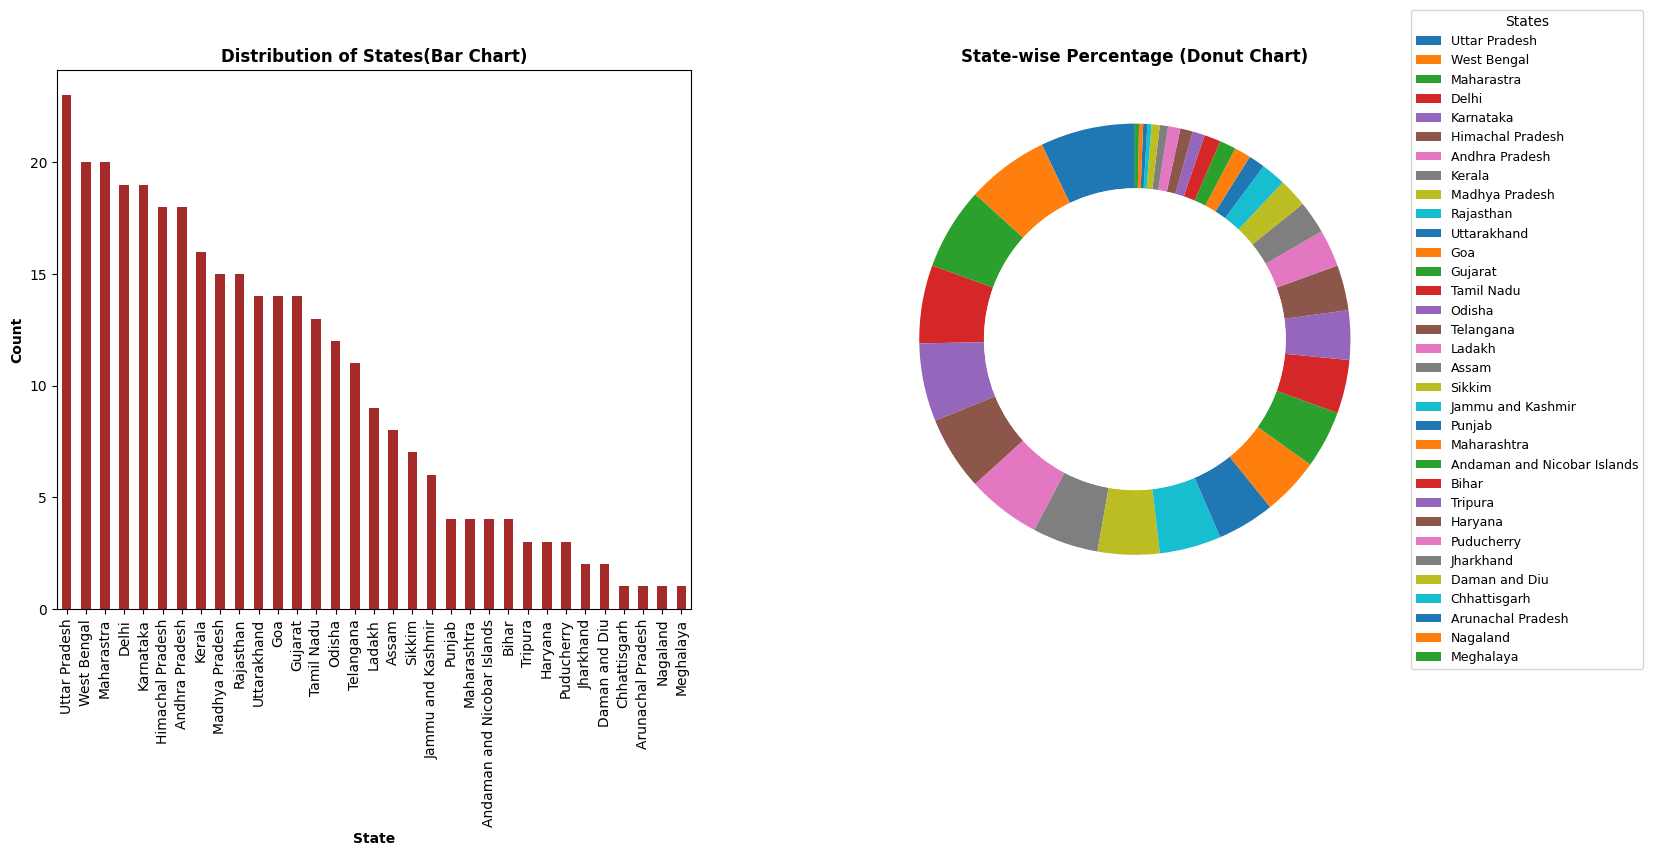

In [19]:
state_counts = df["State"].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
# Bar Graph
state_counts.plot(kind='bar', color='brown', ax=axes[0])
axes[0].set_title("Distribution of States(Bar Chart)", fontweight='bold')
axes[0].set_xlabel("State", fontweight='bold')
axes[0].set_ylabel("Count", fontweight='bold')
axes[0].tick_params(axis='x', rotation=90)
# Donut Chart
wedges,texts=axes[1].pie(state_counts,startangle=90,wedgeprops=dict(width=0.3),
             labels=None)
axes[1].legend(wedges,state_counts.index,title="States",loc="center left",
    bbox_to_anchor=(1, 0.5),fontsize=9)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
axes[1].add_artist(centre_circle)
axes[1].set_title("State-wise Percentage (Donut Chart)", fontweight='bold')
plt.show()


**Classification of Types Of Places**

In [20]:
types=df["Type"].value_counts()
types

,count
Type,
Temple,72
Natural Park,28
Beach,26
Fort,23
Monument,19
Mountain,19
Lake,17
Archaeological Site,17
Museum,15


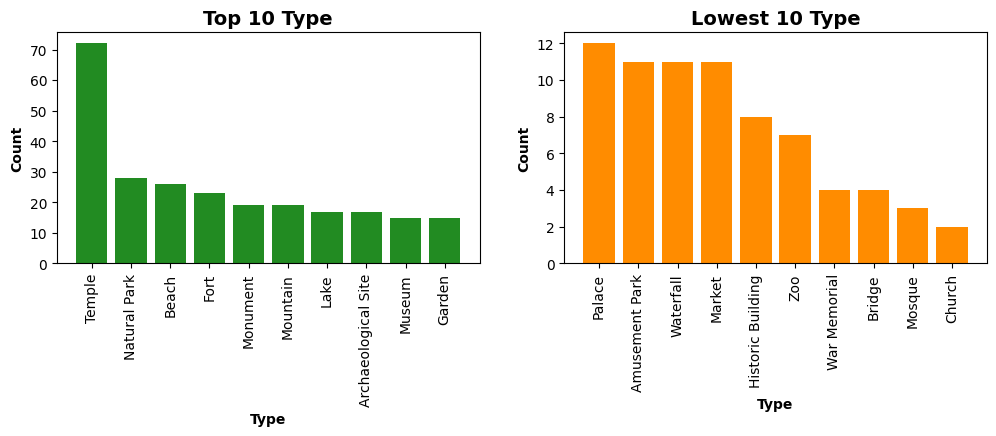

In [21]:
top_10_type = df["Type"].value_counts().head(10)
lowest_10_type = df["Type"].value_counts().tail(10)
fig,axs = plt.subplots(1, 2,figsize=(12, 3))
# Plot Top 10 Type
bars1 = axs[0].bar(top_10_type.index, top_10_type.values, color='forestgreen')
axs[0].set_title("Top 10 Type", fontweight='bold', fontsize=14)
axs[0].set_xlabel("Type", fontweight='bold')
axs[0].set_ylabel("Count", fontweight='bold')
axs[0].tick_params(axis='x',rotation=90)
# Plot Lowest 10 Cities
bars2 = axs[1].bar(lowest_10_type.index, lowest_10_type.values, color='darkorange')
axs[1].set_title("Lowest 10 Type", fontweight='bold', fontsize=14)
axs[1].set_xlabel("Type", fontweight='bold')
axs[1].set_ylabel("Count", fontweight='bold')
axs[1].tick_params(axis='x',rotation=90)
plt.show()

**Distribution of Significance**

In [22]:
significance=df["Significance"].value_counts()
significance

,count
Significance,
Religious,84
Recreational,74
Environmental,64
Historical,59
Archaeological,15
Cultural,11
Educational,10
Architectural,6
Political,1


<Figure size 2000x2000 with 0 Axes>

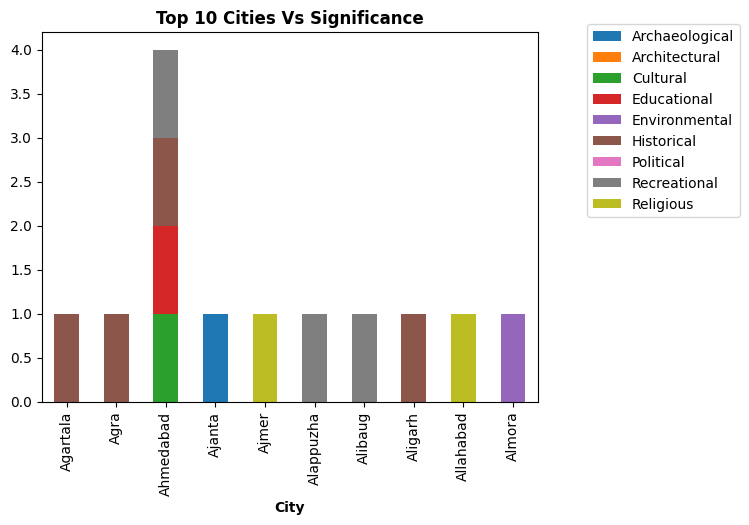

In [23]:
plt.figure(figsize=(20,20))
City_Significance = df.drop_duplicates(subset=["City", "Significance"]).groupby(["City", "Significance"]).size().unstack()
(City_Significance.head(10)).plot(kind='bar' , stacked=True)
plt.title("Top 10 Cities Vs Significance", fontweight='bold')
plt.xlabel("City", fontweight='bold')
plt.legend(loc=(1.1,0.5))
plt.show()

**Which Zone & State has the most tourist places**

In [24]:
import plotly.express as px
Zone = df.groupby("Zone")["State"].value_counts().reset_index(name='count')
#sunburst chart
fig = px.sunburst(data_frame=Zone, path=["Zone", "State"],color="count",
                  branchvalues='remainder',template="plotly_dark",
    title="Which Zone & State has the Most Tourist Attractions(Sunburst chart)",
    height=700,width=800 )
fig.show()


**Which Zone & Significance has the most tourist places**

In [25]:
sing=df.groupby("Zone")["Significance"].value_counts().reset_index()
fig = px.sunburst(data_frame=sing,path=["Zone", "Significance"],color = "count",
    branchvalues='remainder',template="plotly_dark",
    title="Which Zone & Significance has the most tourist places",
    height=700,width=800,color_continuous_scale="turbo")
fig.show()

**Treemap of Tourist Places by State and City**

In [26]:
place_count = df.groupby(["State", "City"]).size().reset_index(name="count")
fig = px.treemap(data_frame=place_count, path=["State", "City"],values="count",
    color="count",color_continuous_scale="Viridis",
    title="Treemap of Tourist Places by State and City",
    height=700,width=900)
fig.show()


**Analysis on Entrance Fee**

Text(0, 0.5, 'Avg Entrance Fee')

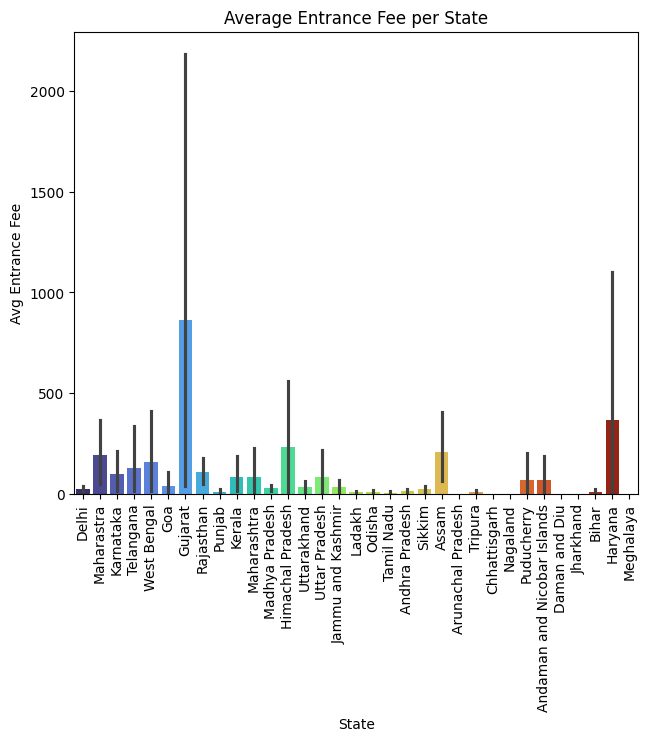

In [27]:
plt.figure(figsize=(16,6))
# Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(data=df, x="State", y="Entrance Fee in INR", estimator='mean', palette="turbo")
plt.title("Average Entrance Fee per State")
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Avg Entrance Fee")

**Google Review Rating**

Text(0, 0.5, 'Google Review Ratings')

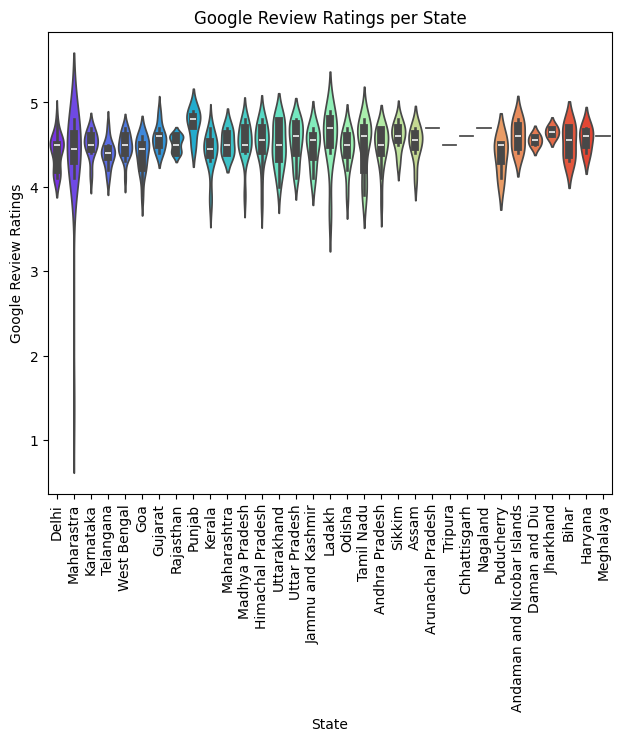

In [28]:
plt.figure(figsize=(16,6))
# Violin Plot
plt.subplot(1, 2, 1)
sns.violinplot(data=df, x="State", y="Google review rating", palette="rainbow")
plt.title("Google Review Ratings per State")
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Google Review Ratings")


**Bubble Chart: Entrance Fee vs Google Review**

In [29]:
state_count = df["State"].value_counts().to_dict()
df["State_Count"] = df["State"].map(state_count)
import plotly.express as px
fig = px.scatter(df, x="Entrance Fee in INR", y="Google review rating",
      size="State_Count", color="Zone",
    hover_name="Name",
    title="Bubble Chart: Entrance Fee vs Google Review (Bubble = No. of Places in State)",
    template="plotly_dark")
fig.show()

##**5. Feature Engineering**

###**5.1. Encode Categorical Value**

In [30]:
df['Best DayTime to visit'] = df['Best DayTime to visit'].str.strip()  # Remove trailing spaces
df['Best DayTime to visit'] = df['Best DayTime to visit'].replace(['All ', 'Anytime'], 'All')  # Standardize

In [31]:
from sklearn.preprocessing import LabelEncoder
# Label encode the target variable
le = LabelEncoder()
df['Best DayTime to visit'] = le.fit_transform(df['Best DayTime to visit'])
print("Label Encoder Mapping for 'Best DayTime to visit':")
for i, class_name in enumerate(le.classes_):
    print(f"{i}: {class_name}")

Label Encoder Mapping for 'Best DayTime to visit':
0: Afternoon
1: All
2: Evening
3: Morning
4: Night


In [32]:
# One-hot encode categorical columns
categorical_cols = ['Zone', 'Type', 'Significance', 'Weekly Off', 'State', 'City']
df_original = df[categorical_cols + ['Name']].copy()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

###**5.2. Feature Scaling**

In [33]:
from sklearn.preprocessing import StandardScaler
# Standardize numerical features
numerical_cols = ['Entrance Fee in INR', 'Google review rating']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

###**5.3. Train-Test Split**

In [34]:
from sklearn.model_selection import train_test_split
# features (X) and target (y)
X = df.drop(['Best DayTime to visit', 'Name'], axis=1)
y = df['Best DayTime to visit']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##**6. Model Development**

###**6.1. Classification: Predict "Best DayTime to Visit"**

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


Logistic Regression Results:
Accuracy: 0.5385
Precision: 0.5157
Recall: 0.5385
F1-Score: 0.4844
Confusion Matrix:
[[ 1  7  1  4  0]
 [ 0 21  0  2  0]
 [ 1  2  3  2  0]
 [ 1  9  0 10  0]
 [ 0  1  0  0  0]]


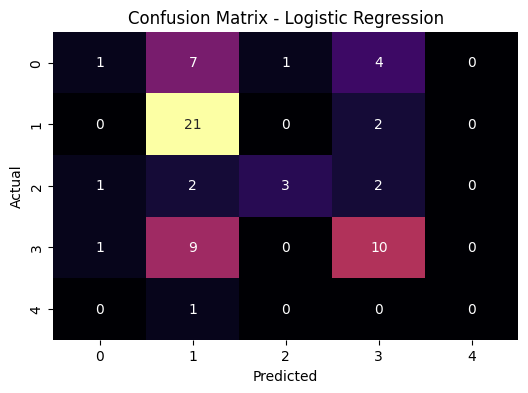


Decision Tree Results:
Accuracy: 0.4615
Precision: 0.5686
Recall: 0.4615
F1-Score: 0.4085
Confusion Matrix:
[[ 2 10  0  1  0]
 [ 2 21  0  0  0]
 [ 0  5  2  1  0]
 [ 1 14  0  5  0]
 [ 0  1  0  0  0]]


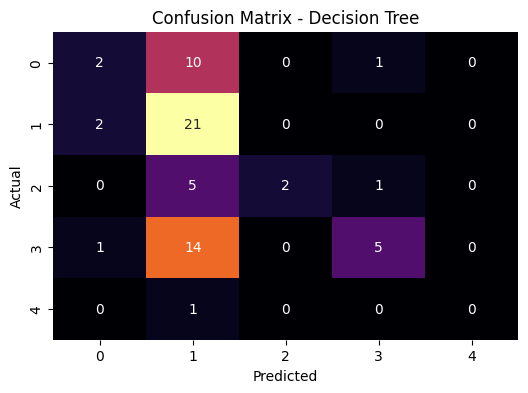


SVM (RBF Kernel) Results:
Accuracy: 0.3538
Precision: 0.1252
Recall: 0.3538
F1-Score: 0.1850
Confusion Matrix:
[[ 0 13  0  0  0]
 [ 0 23  0  0  0]
 [ 0  8  0  0  0]
 [ 0 20  0  0  0]
 [ 0  1  0  0  0]]


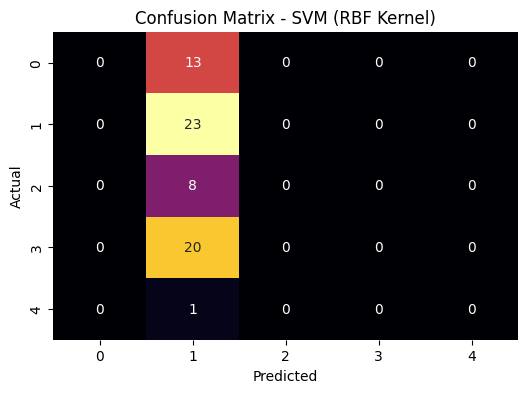


Random Forest Results:
Accuracy: 0.3846
Precision: 0.2543
Recall: 0.3846
F1-Score: 0.2407
Confusion Matrix:
[[ 0 13  0  0  0]
 [ 0 23  0  0  0]
 [ 0  5  2  1  0]
 [ 0 20  0  0  0]
 [ 0  1  0  0  0]]


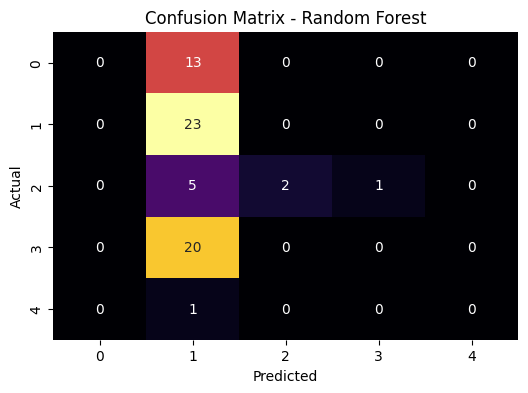


=== Model Comparison ===
              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.538462   0.515684 0.538462  0.484379
      Decision Tree  0.461538   0.568559 0.461538  0.408467
   SVM (RBF Kernel)  0.353846   0.125207 0.353846  0.184965
      Random Forest  0.384615   0.254342 0.384615  0.240724


In [36]:
classifiers = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)}
results = []
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1})
    # Print results
    print(f'\n{name} Results:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print('Confusion Matrix:')
    print(conf_matrix)
    # Visualize confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='inferno', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f'confusion_matrix_{name.lower().replace(" ", "_")}.png')
    plt.show()
# Display comparison table
results_df = pd.DataFrame(results)
print("\n=== Model Comparison ===")
print(results_df.to_string(index=False))

###**6.2. Clustering: Group Similar Destinations**

In [37]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

=== Elbow Method for K-Means ===


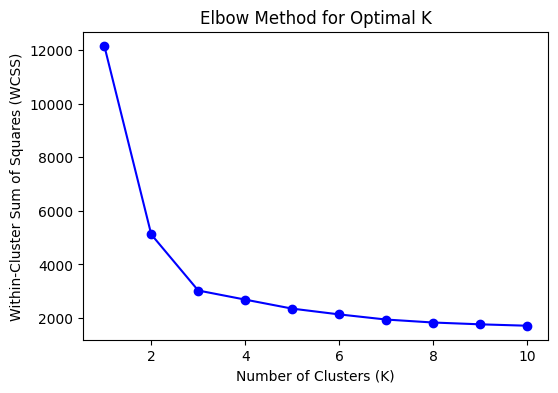

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clustering_results = []
print("=== Elbow Method for K-Means ===")
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_range, wcss, 'bo-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.savefig('elbow_method.png')
plt.show()


=== K-Means Clustering with Optimal K ===
Optimal K: 3
Silhouette Score: 0.4178


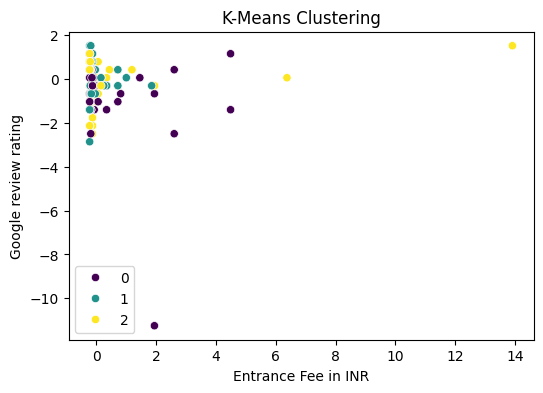

In [39]:
optimal_k = 3
clustering_results = []
# === K-Means Clustering with Optimal K ===
print("\n=== K-Means Clustering with Optimal K ===")
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
kmeans_silhouette = silhouette_score(X, kmeans_labels)
clustering_results.append({
    'Model': 'K-Means',
    'Silhouette Score': kmeans_silhouette})
print(f'Optimal K: {optimal_k}')
print(f'Silhouette Score: {kmeans_silhouette:.4f}')
# Visualize K-Means clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()


=== DBSCAN Clustering ===
Silhouette Score: 0.3166


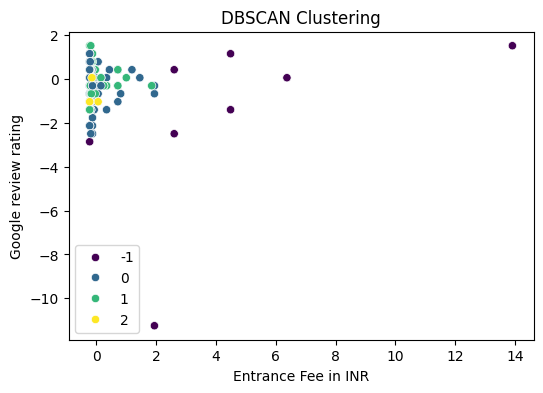

In [40]:
# 2. DBSCAN Clustering
print("\n=== DBSCAN Clustering ===")
dbscan = DBSCAN(eps=3.0, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

if len(np.unique(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(X, dbscan_labels)
    clustering_results.append({
        'Model': 'DBSCAN',
        'Silhouette Score': dbscan_silhouette})
    print(f'Silhouette Score: {dbscan_silhouette:.4f}')
else:
    clustering_results.append({
        'Model': 'DBSCAN',
        'Silhouette Score': 'N/A (Too few clusters or only noise)'})
    print("DBSCAN failed to find meaningful clusters (try adjusting eps and min_samples).")
# Visualize DBSCAN clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=dbscan_labels, palette='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.savefig('dbscan_clusters.png')
plt.show()


=== Hierarchical Clustering ===
Silhouette Score: 0.4124


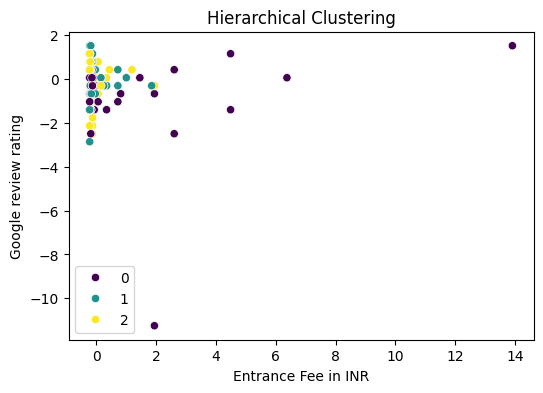

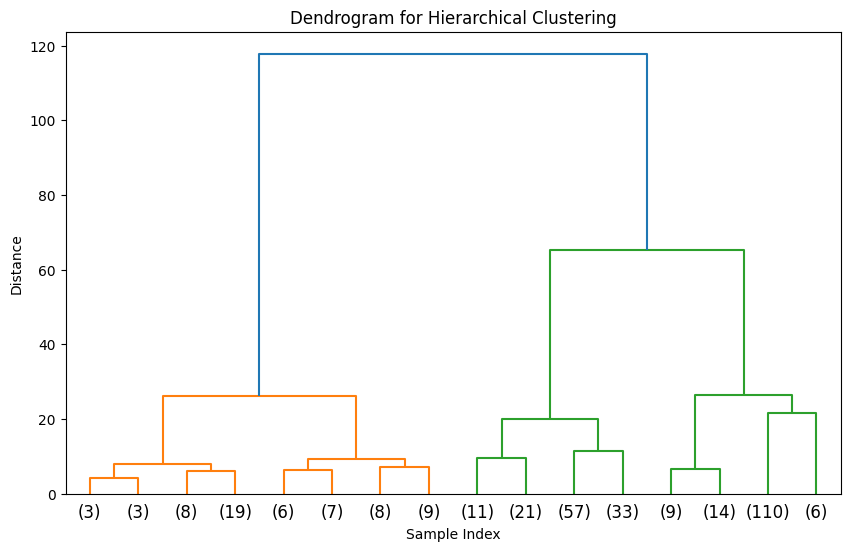

In [41]:
#3. Hierarchical Clustering
print("\n=== Hierarchical Clustering ===")
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X)
hierarchical_silhouette = silhouette_score(X, hierarchical_labels)
clustering_results.append({
    'Model': 'Hierarchical',
    'Silhouette Score': hierarchical_silhouette
})
print(f'Silhouette Score: {hierarchical_silhouette:.4f}')
# Visualize Hierarchical clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=hierarchical_labels, palette='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.savefig('hierarchical_clusters.png')
plt.show()
# Dendrogram for Hierarchical Clustering
plt.figure(figsize=(10, 6))
linked = linkage(X, method='ward')
dendrogram(linked, truncate_mode='level', p=3)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.savefig('dendrogram.png')
plt.show()

In [42]:
# Display comparison table
print("\n=== Clustering Comparison ===")
results_df = pd.DataFrame(clustering_results)
print(results_df.to_string(index=False))


=== Clustering Comparison ===
       Model  Silhouette Score
     K-Means          0.417769
      DBSCAN          0.316577
Hierarchical          0.412383
